# Benchmark RNA folder

Benchmarking my RNA folder compared to ViennaRNA. 
## Bad_Seq Dataset
### Parameters
**Dataset**: bad_seq

**Seq. Length**: < 80 ntds

**minBPinStem**: 3

In [1]:
import numpy as np
import os, sys, glob
import matplotlib.pyplot as plt
sys.path.append('/Users/harrisonlabollita/Arizona State University/Sulc group/src/kinetic_RNA/')
import gillespie as GILLESPIE
import time
import matplotlib.pyplot as plt 
import matplotlib
matplotlib.rc('text', usetex = True)
matplotlib.rc('font', **{'family':'serif', 'serif':['Computer Modern Roman, Times']})

In [2]:
def str_append(s):
    output = ''
    output += s
    return output

def readFile(file):
    f = open(file, 'r')
    for i, line in enumerate(f):
        if i == 1:
            seq = line.rstrip()
        if i == 2:
            dots = line.split(' ')[1]
            dots.rstrip()
        if i == 3:
            rnafold = line.split(' ')[1]
            rnafold.rstrip()
    return seq, dots, rnafold

def compareStructs(pred, answer):
    count = 0
    for i in range(len(pred)):
        if pred[i] != answer[i]:
            count +=1
    return count

def myReplace(string):
    newString = ''
    for i in range(len(string)):
        if string[i] == ']':
            newString += ')'
        elif string[i] == '[':
            newString += '('
        else:
            newString += string[i]
    return newString

def getData(length, files):
    sequences = []
    brackets = []
    viennaRNA = []
    for file in files:
        seq, dot, rnafold = readFile(file)
        if len(seq) <= length:
            sequences.append(seq)
            brackets.append(dot)
            viennaRNA.append(rnafold)
    return sequences, brackets, viennaRNA

In [3]:
seq_files = glob.glob('/Users/harrisonlabollita/Arizona State University/Sulc group/data_set/bad_seq/*')
sequences, dotbrackets, viennaRNA = getData(80, seq_files)
seqLength = [len(seq) for seq in sequences]
print('Length of dataset: %d' %(len(sequences)))
print('Mean Length: %d' %(np.mean(seqLength)))
print('Max Length: %d' %(np.max(seqLength)))
print('Min Length: %d' %(np.min(seqLength)))

Length of dataset: 117
Mean Length: 73
Max Length: 78
Min Length: 71


In [4]:
total_misses = []
rna_misses = []
for i in range(len(sequences)):
    seq = sequences[i]
    dot = dotbrackets[i]
    rnafold = viennaRNA[i]
    start = time.time()
    G = GILLESPIE.Gillespie(seq, [], maxTime = 5, toPrint = False, initTime = False)
    structure = myReplace(G.runGillespie())
    mistakes = compareStructs(structure, dot)
    rna_mistake = compareStructs(rnafold, dot)
    rna_mistake /= len(seq)
    mistakes /= len(seq)
    total_misses.append(mistakes)
    rna_misses.append(rna_mistake)
    stop = time.time()
    print('{}/{}, Length: {}, Time: {:0.4f}, myHD: {:0.2f} RNAfoldHD: {:0.2f}'.format(i+1, len(sequences), len(seq), abs(stop-start), mistakes, rna_mistake))

1/117, Length: 73, Time: 0.0512, myHD: 0.55 RNAfoldHD: 0.48
2/117, Length: 73, Time: 0.0208, myHD: 0.58 RNAfoldHD: 0.26
3/117, Length: 78, Time: 0.0931, myHD: 0.51 RNAfoldHD: 0.36
4/117, Length: 76, Time: 0.0195, myHD: 0.53 RNAfoldHD: 0.30
5/117, Length: 72, Time: 0.0189, myHD: 0.50 RNAfoldHD: 0.49
6/117, Length: 77, Time: 0.0356, myHD: 0.44 RNAfoldHD: 0.35
7/117, Length: 72, Time: 0.0199, myHD: 0.50 RNAfoldHD: 0.36
8/117, Length: 73, Time: 0.0279, myHD: 0.55 RNAfoldHD: 0.40
9/117, Length: 72, Time: 0.0226, myHD: 0.53 RNAfoldHD: 0.28
10/117, Length: 74, Time: 0.0335, myHD: 0.49 RNAfoldHD: 0.49
11/117, Length: 72, Time: 0.0327, myHD: 0.50 RNAfoldHD: 0.44
12/117, Length: 74, Time: 0.0607, myHD: 0.54 RNAfoldHD: 0.39
13/117, Length: 78, Time: 0.0243, myHD: 0.49 RNAfoldHD: 0.33


/Users/harrisonlabollita/Arizona State University/Sulc group/src/kinetic_RNA/helperfunctions.py:207: RuntimeWarning: overflow encountered in exp
  updateRates.append([np.exp(deltaS/kB), 1, trialIndex[i]])
/Users/harrisonlabollita/Arizona State University/Sulc group/src/kinetic_RNA/helperfunctions.py:41: RuntimeWarning: invalid value encountered in double_scalars
  rates[i][0] = rates[i][0]/normalization


14/117, Length: 74, Time: 0.3377, myHD: 0.57 RNAfoldHD: 0.31
15/117, Length: 76, Time: 0.0241, myHD: 0.55 RNAfoldHD: 0.33
16/117, Length: 72, Time: 1.0550, myHD: 0.54 RNAfoldHD: 0.39
17/117, Length: 76, Time: 0.0229, myHD: 0.51 RNAfoldHD: 0.30
18/117, Length: 74, Time: 0.0179, myHD: 0.57 RNAfoldHD: 0.26
19/117, Length: 76, Time: 0.0197, myHD: 0.47 RNAfoldHD: 0.33


/Users/harrisonlabollita/Arizona State University/Sulc group/src/kinetic_RNA/helperfunctions.py:207: RuntimeWarning: overflow encountered in exp
  updateRates.append([np.exp(deltaS/kB), 1, trialIndex[i]])
/Users/harrisonlabollita/Arizona State University/Sulc group/src/kinetic_RNA/helperfunctions.py:41: RuntimeWarning: invalid value encountered in double_scalars
  rates[i][0] = rates[i][0]/normalization


20/117, Length: 73, Time: 0.5815, myHD: 0.55 RNAfoldHD: 0.44


/Users/harrisonlabollita/Arizona State University/Sulc group/src/kinetic_RNA/helperfunctions.py:207: RuntimeWarning: overflow encountered in exp
  updateRates.append([np.exp(deltaS/kB), 1, trialIndex[i]])
/Users/harrisonlabollita/Arizona State University/Sulc group/src/kinetic_RNA/helperfunctions.py:41: RuntimeWarning: invalid value encountered in double_scalars
  rates[i][0] = rates[i][0]/normalization


21/117, Length: 72, Time: 0.8520, myHD: 0.51 RNAfoldHD: 0.25
22/117, Length: 74, Time: 0.0486, myHD: 0.38 RNAfoldHD: 0.38
23/117, Length: 72, Time: 0.0201, myHD: 0.50 RNAfoldHD: 0.49
24/117, Length: 75, Time: 0.0578, myHD: 0.51 RNAfoldHD: 0.35
25/117, Length: 76, Time: 0.0317, myHD: 0.45 RNAfoldHD: 0.28
26/117, Length: 72, Time: 0.0316, myHD: 0.50 RNAfoldHD: 0.44
27/117, Length: 71, Time: 0.4142, myHD: 0.49 RNAfoldHD: 0.44
28/117, Length: 72, Time: 0.0725, myHD: 0.56 RNAfoldHD: 0.42
29/117, Length: 74, Time: 0.0464, myHD: 0.54 RNAfoldHD: 0.38
30/117, Length: 74, Time: 0.3808, myHD: 0.46 RNAfoldHD: 0.36
31/117, Length: 76, Time: 0.0302, myHD: 0.45 RNAfoldHD: 0.26
32/117, Length: 74, Time: 0.0282, myHD: 0.54 RNAfoldHD: 0.41
33/117, Length: 75, Time: 0.1144, myHD: 0.48 RNAfoldHD: 0.40
34/117, Length: 72, Time: 0.0182, myHD: 0.50 RNAfoldHD: 0.31


/Users/harrisonlabollita/Arizona State University/Sulc group/src/kinetic_RNA/helperfunctions.py:207: RuntimeWarning: overflow encountered in exp
  updateRates.append([np.exp(deltaS/kB), 1, trialIndex[i]])
/Users/harrisonlabollita/Arizona State University/Sulc group/src/kinetic_RNA/helperfunctions.py:41: RuntimeWarning: invalid value encountered in double_scalars
  rates[i][0] = rates[i][0]/normalization


35/117, Length: 73, Time: 8.0591, myHD: 0.44 RNAfoldHD: 0.45
36/117, Length: 73, Time: 0.0232, myHD: 0.58 RNAfoldHD: 0.52
37/117, Length: 76, Time: 0.0253, myHD: 0.45 RNAfoldHD: 0.29
38/117, Length: 73, Time: 0.1382, myHD: 0.55 RNAfoldHD: 0.45


/Users/harrisonlabollita/Arizona State University/Sulc group/src/kinetic_RNA/helperfunctions.py:207: RuntimeWarning: overflow encountered in exp
  updateRates.append([np.exp(deltaS/kB), 1, trialIndex[i]])
/Users/harrisonlabollita/Arizona State University/Sulc group/src/kinetic_RNA/helperfunctions.py:41: RuntimeWarning: invalid value encountered in double_scalars
  rates[i][0] = rates[i][0]/normalization


39/117, Length: 76, Time: 234.2694, myHD: 0.47 RNAfoldHD: 0.49
40/117, Length: 74, Time: 0.0557, myHD: 0.57 RNAfoldHD: 0.38
41/117, Length: 74, Time: 0.0878, myHD: 0.41 RNAfoldHD: 0.53
42/117, Length: 73, Time: 0.0228, myHD: 0.52 RNAfoldHD: 0.45


/Users/harrisonlabollita/Arizona State University/Sulc group/src/kinetic_RNA/helperfunctions.py:207: RuntimeWarning: overflow encountered in exp
  updateRates.append([np.exp(deltaS/kB), 1, trialIndex[i]])
/Users/harrisonlabollita/Arizona State University/Sulc group/src/kinetic_RNA/helperfunctions.py:41: RuntimeWarning: invalid value encountered in double_scalars
  rates[i][0] = rates[i][0]/normalization


43/117, Length: 72, Time: 0.0858, myHD: 0.53 RNAfoldHD: 0.43
44/117, Length: 73, Time: 0.0256, myHD: 0.58 RNAfoldHD: 0.52
45/117, Length: 74, Time: 0.0221, myHD: 0.51 RNAfoldHD: 0.41
46/117, Length: 76, Time: 0.1147, myHD: 0.42 RNAfoldHD: 0.49
47/117, Length: 75, Time: 0.2454, myHD: 0.36 RNAfoldHD: 0.28
48/117, Length: 76, Time: 0.2626, myHD: 0.62 RNAfoldHD: 0.53
49/117, Length: 74, Time: 0.3367, myHD: 0.42 RNAfoldHD: 0.36
50/117, Length: 71, Time: 0.1670, myHD: 0.37 RNAfoldHD: 0.30
51/117, Length: 73, Time: 0.0432, myHD: 0.52 RNAfoldHD: 0.36
52/117, Length: 74, Time: 0.0157, myHD: 0.57 RNAfoldHD: 0.39
53/117, Length: 71, Time: 0.0774, myHD: 0.45 RNAfoldHD: 0.28
54/117, Length: 73, Time: 0.2127, myHD: 0.44 RNAfoldHD: 0.51
55/117, Length: 74, Time: 0.0363, myHD: 0.46 RNAfoldHD: 0.36


/Users/harrisonlabollita/Arizona State University/Sulc group/src/kinetic_RNA/helperfunctions.py:207: RuntimeWarning: overflow encountered in exp
  updateRates.append([np.exp(deltaS/kB), 1, trialIndex[i]])
/Users/harrisonlabollita/Arizona State University/Sulc group/src/kinetic_RNA/helperfunctions.py:41: RuntimeWarning: invalid value encountered in double_scalars
  rates[i][0] = rates[i][0]/normalization


56/117, Length: 73, Time: 92.0896, myHD: 0.41 RNAfoldHD: 0.38
57/117, Length: 74, Time: 0.1387, myHD: 0.49 RNAfoldHD: 0.45
58/117, Length: 71, Time: 0.0198, myHD: 0.45 RNAfoldHD: 0.28
59/117, Length: 71, Time: 0.0911, myHD: 0.51 RNAfoldHD: 0.28
60/117, Length: 76, Time: 0.0214, myHD: 0.55 RNAfoldHD: 0.41
61/117, Length: 71, Time: 0.1652, myHD: 0.39 RNAfoldHD: 0.30
62/117, Length: 73, Time: 0.2053, myHD: 0.38 RNAfoldHD: 0.51


/Users/harrisonlabollita/Arizona State University/Sulc group/src/kinetic_RNA/helperfunctions.py:207: RuntimeWarning: overflow encountered in exp
  updateRates.append([np.exp(deltaS/kB), 1, trialIndex[i]])
/Users/harrisonlabollita/Arizona State University/Sulc group/src/kinetic_RNA/helperfunctions.py:41: RuntimeWarning: invalid value encountered in double_scalars
  rates[i][0] = rates[i][0]/normalization


63/117, Length: 73, Time: 6.3996, myHD: 0.60 RNAfoldHD: 0.27


/Users/harrisonlabollita/Arizona State University/Sulc group/src/kinetic_RNA/helperfunctions.py:207: RuntimeWarning: overflow encountered in exp
  updateRates.append([np.exp(deltaS/kB), 1, trialIndex[i]])
/Users/harrisonlabollita/Arizona State University/Sulc group/src/kinetic_RNA/helperfunctions.py:41: RuntimeWarning: invalid value encountered in double_scalars
  rates[i][0] = rates[i][0]/normalization


64/117, Length: 77, Time: 8.2376, myHD: 0.47 RNAfoldHD: 0.49
65/117, Length: 75, Time: 0.0440, myHD: 0.49 RNAfoldHD: 0.37
66/117, Length: 73, Time: 0.0388, myHD: 0.47 RNAfoldHD: 0.26
67/117, Length: 71, Time: 0.1511, myHD: 0.37 RNAfoldHD: 0.35
68/117, Length: 72, Time: 0.0189, myHD: 0.61 RNAfoldHD: 0.25


/Users/harrisonlabollita/Arizona State University/Sulc group/src/kinetic_RNA/helperfunctions.py:207: RuntimeWarning: overflow encountered in exp
  updateRates.append([np.exp(deltaS/kB), 1, trialIndex[i]])
/Users/harrisonlabollita/Arizona State University/Sulc group/src/kinetic_RNA/helperfunctions.py:41: RuntimeWarning: invalid value encountered in double_scalars
  rates[i][0] = rates[i][0]/normalization


69/117, Length: 74, Time: 0.3678, myHD: 0.49 RNAfoldHD: 0.31


/Users/harrisonlabollita/Arizona State University/Sulc group/src/kinetic_RNA/helperfunctions.py:207: RuntimeWarning: overflow encountered in exp
  updateRates.append([np.exp(deltaS/kB), 1, trialIndex[i]])
/Users/harrisonlabollita/Arizona State University/Sulc group/src/kinetic_RNA/helperfunctions.py:41: RuntimeWarning: invalid value encountered in double_scalars
  rates[i][0] = rates[i][0]/normalization


70/117, Length: 77, Time: 0.3049, myHD: 0.36 RNAfoldHD: 0.26
71/117, Length: 76, Time: 0.0324, myHD: 0.50 RNAfoldHD: 0.33
72/117, Length: 73, Time: 0.0577, myHD: 0.58 RNAfoldHD: 0.47
73/117, Length: 71, Time: 0.3519, myHD: 0.37 RNAfoldHD: 0.34


/Users/harrisonlabollita/Arizona State University/Sulc group/src/kinetic_RNA/helperfunctions.py:207: RuntimeWarning: overflow encountered in exp
  updateRates.append([np.exp(deltaS/kB), 1, trialIndex[i]])
/Users/harrisonlabollita/Arizona State University/Sulc group/src/kinetic_RNA/helperfunctions.py:41: RuntimeWarning: invalid value encountered in double_scalars
  rates[i][0] = rates[i][0]/normalization


74/117, Length: 74, Time: 2.8177, myHD: 0.38 RNAfoldHD: 0.41


/Users/harrisonlabollita/Arizona State University/Sulc group/src/kinetic_RNA/helperfunctions.py:207: RuntimeWarning: overflow encountered in exp
  updateRates.append([np.exp(deltaS/kB), 1, trialIndex[i]])
/Users/harrisonlabollita/Arizona State University/Sulc group/src/kinetic_RNA/helperfunctions.py:41: RuntimeWarning: invalid value encountered in double_scalars
  rates[i][0] = rates[i][0]/normalization


75/117, Length: 77, Time: 0.2407, myHD: 0.52 RNAfoldHD: 0.38
76/117, Length: 74, Time: 0.0179, myHD: 0.49 RNAfoldHD: 0.35
77/117, Length: 71, Time: 0.3983, myHD: 0.31 RNAfoldHD: 0.34
78/117, Length: 71, Time: 0.0213, myHD: 0.62 RNAfoldHD: 0.31
79/117, Length: 73, Time: 0.1119, myHD: 0.44 RNAfoldHD: 0.34
80/117, Length: 73, Time: 0.0432, myHD: 0.49 RNAfoldHD: 0.40
81/117, Length: 75, Time: 0.0659, myHD: 0.51 RNAfoldHD: 0.35


/Users/harrisonlabollita/Arizona State University/Sulc group/src/kinetic_RNA/helperfunctions.py:207: RuntimeWarning: overflow encountered in exp
  updateRates.append([np.exp(deltaS/kB), 1, trialIndex[i]])
/Users/harrisonlabollita/Arizona State University/Sulc group/src/kinetic_RNA/helperfunctions.py:41: RuntimeWarning: invalid value encountered in double_scalars
  rates[i][0] = rates[i][0]/normalization


82/117, Length: 74, Time: 11.1863, myHD: 0.55 RNAfoldHD: 0.31
83/117, Length: 72, Time: 0.0166, myHD: 0.58 RNAfoldHD: 0.38
84/117, Length: 78, Time: 0.0234, myHD: 0.54 RNAfoldHD: 0.33


/Users/harrisonlabollita/Arizona State University/Sulc group/src/kinetic_RNA/helperfunctions.py:207: RuntimeWarning: overflow encountered in exp
  updateRates.append([np.exp(deltaS/kB), 1, trialIndex[i]])
/Users/harrisonlabollita/Arizona State University/Sulc group/src/kinetic_RNA/helperfunctions.py:41: RuntimeWarning: invalid value encountered in double_scalars
  rates[i][0] = rates[i][0]/normalization
/Users/harrisonlabollita/Arizona State University/Sulc group/src/kinetic_RNA/helperfunctions.py:207: RuntimeWarning: overflow encountered in exp
  updateRates.append([np.exp(deltaS/kB), 1, trialIndex[i]])
/Users/harrisonlabollita/Arizona State University/Sulc group/src/kinetic_RNA/helperfunctions.py:41: RuntimeWarning: invalid value encountered in double_scalars
  rates[i][0] = rates[i][0]/normalization


85/117, Length: 73, Time: 156.4457, myHD: 0.49 RNAfoldHD: 0.38
86/117, Length: 72, Time: 0.0783, myHD: 0.42 RNAfoldHD: 0.35
87/117, Length: 76, Time: 0.0248, myHD: 0.55 RNAfoldHD: 0.30
88/117, Length: 73, Time: 0.0541, myHD: 0.41 RNAfoldHD: 0.47
89/117, Length: 75, Time: 0.0427, myHD: 0.56 RNAfoldHD: 0.37
90/117, Length: 72, Time: 0.0472, myHD: 0.44 RNAfoldHD: 0.28
91/117, Length: 73, Time: 0.0294, myHD: 0.49 RNAfoldHD: 0.40
92/117, Length: 77, Time: 0.2034, myHD: 0.31 RNAfoldHD: 0.32
93/117, Length: 74, Time: 2.7498, myHD: 0.30 RNAfoldHD: 0.41
94/117, Length: 76, Time: 0.0268, myHD: 0.45 RNAfoldHD: 0.29
95/117, Length: 74, Time: 0.0184, myHD: 0.57 RNAfoldHD: 0.38
96/117, Length: 74, Time: 0.2210, myHD: 0.57 RNAfoldHD: 0.42


/Users/harrisonlabollita/Arizona State University/Sulc group/src/kinetic_RNA/helperfunctions.py:207: RuntimeWarning: overflow encountered in exp
  updateRates.append([np.exp(deltaS/kB), 1, trialIndex[i]])
/Users/harrisonlabollita/Arizona State University/Sulc group/src/kinetic_RNA/helperfunctions.py:41: RuntimeWarning: invalid value encountered in double_scalars
  rates[i][0] = rates[i][0]/normalization


97/117, Length: 75, Time: 7.9630, myHD: 0.52 RNAfoldHD: 0.32


/Users/harrisonlabollita/Arizona State University/Sulc group/src/kinetic_RNA/helperfunctions.py:207: RuntimeWarning: overflow encountered in exp
  updateRates.append([np.exp(deltaS/kB), 1, trialIndex[i]])
/Users/harrisonlabollita/Arizona State University/Sulc group/src/kinetic_RNA/helperfunctions.py:41: RuntimeWarning: invalid value encountered in double_scalars
  rates[i][0] = rates[i][0]/normalization


98/117, Length: 77, Time: 95.3396, myHD: 0.47 RNAfoldHD: 0.42
99/117, Length: 74, Time: 0.2626, myHD: 0.58 RNAfoldHD: 0.42
100/117, Length: 74, Time: 0.0741, myHD: 0.49 RNAfoldHD: 0.38


/Users/harrisonlabollita/Arizona State University/Sulc group/src/kinetic_RNA/helperfunctions.py:207: RuntimeWarning: overflow encountered in exp
  updateRates.append([np.exp(deltaS/kB), 1, trialIndex[i]])
/Users/harrisonlabollita/Arizona State University/Sulc group/src/kinetic_RNA/helperfunctions.py:41: RuntimeWarning: invalid value encountered in double_scalars
  rates[i][0] = rates[i][0]/normalization


101/117, Length: 76, Time: 1.4765, myHD: 0.34 RNAfoldHD: 0.43
102/117, Length: 73, Time: 0.0375, myHD: 0.60 RNAfoldHD: 0.51
103/117, Length: 77, Time: 0.2157, myHD: 0.47 RNAfoldHD: 0.42
104/117, Length: 72, Time: 0.0372, myHD: 0.53 RNAfoldHD: 0.28
105/117, Length: 74, Time: 0.0357, myHD: 0.46 RNAfoldHD: 0.50
106/117, Length: 76, Time: 0.0225, myHD: 0.47 RNAfoldHD: 0.37
107/117, Length: 73, Time: 0.1902, myHD: 0.52 RNAfoldHD: 0.26
108/117, Length: 72, Time: 0.0217, myHD: 0.50 RNAfoldHD: 0.26


/Users/harrisonlabollita/Arizona State University/Sulc group/src/kinetic_RNA/helperfunctions.py:207: RuntimeWarning: overflow encountered in exp
  updateRates.append([np.exp(deltaS/kB), 1, trialIndex[i]])
/Users/harrisonlabollita/Arizona State University/Sulc group/src/kinetic_RNA/helperfunctions.py:41: RuntimeWarning: invalid value encountered in double_scalars
  rates[i][0] = rates[i][0]/normalization


109/117, Length: 74, Time: 49.8116, myHD: 0.49 RNAfoldHD: 0.39
110/117, Length: 74, Time: 0.3783, myHD: 0.34 RNAfoldHD: 0.27
111/117, Length: 77, Time: 0.0424, myHD: 0.42 RNAfoldHD: 0.39
112/117, Length: 76, Time: 0.0855, myHD: 0.42 RNAfoldHD: 0.49
113/117, Length: 74, Time: 0.0345, myHD: 0.46 RNAfoldHD: 0.50
114/117, Length: 74, Time: 0.3678, myHD: 0.49 RNAfoldHD: 0.39
115/117, Length: 76, Time: 0.0302, myHD: 0.55 RNAfoldHD: 0.37
116/117, Length: 77, Time: 0.0204, myHD: 0.55 RNAfoldHD: 0.44
117/117, Length: 73, Time: 0.0179, myHD: 0.58 RNAfoldHD: 0.26


/Users/harrisonlabollita/Arizona State University/Sulc group/src/kinetic_RNA/helperfunctions.py:207: RuntimeWarning: overflow encountered in exp
  updateRates.append([np.exp(deltaS/kB), 1, trialIndex[i]])
/Users/harrisonlabollita/Arizona State University/Sulc group/src/kinetic_RNA/helperfunctions.py:41: RuntimeWarning: invalid value encountered in double_scalars
  rates[i][0] = rates[i][0]/normalization


In [5]:
print('myMean:', np.mean(total_misses))
print('myMin:', np.min(total_misses))
print('myMax:', np.max(total_misses))
print('rnaMean:', np.mean(rna_misses))
print('rnaMin:', np.min(rna_misses))
print('rnaMax:', np.max(rna_misses))

myMean: 0.4892199552135531
myMin: 0.2972972972972973
myMax: 0.6197183098591549
rnaMean: 0.37461736420292935
rnaMin: 0.25
rnaMax: 0.527027027027027


# myFolder Results

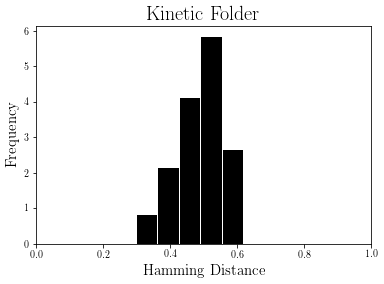

In [12]:
#myCorrect = [1 - total_misses[i] for i in range(len(total_misses))]
plt.figure()
plt.title('Kinetic Folder', fontsize = 20)
plt.xlabel('Hamming Distance', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
#plt.grid(True, linestyle = ':', linewidth = 1)
plt.hist(total_misses, bins = 5, density = True, histtype = 'bar', rwidth =0.95, color = 'black',linewidth = 2)
plt.xlim([0,1])
plt.show()
#plt.savefig('myfolder.eps', format = 'eps')

# ViennaRNA Results

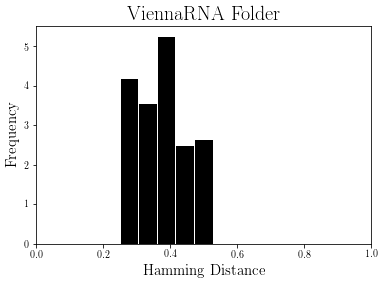

In [14]:
#rnaCorrect = [1- rna_misses[i] for i in range(len(rna_misses))]
plt.figure()
plt.title('ViennaRNA Folder', fontsize = 20)
plt.xlabel('Hamming Distance', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
#plt.grid(True, linestyle = ':', linewidth = 1)
plt.hist(rna_misses, bins = 5, density = True, histtype = 'bar', rwidth = 0.96, color = 'black',linewidth = 2)
plt.xlim([0,1])
plt.show()
#plt.savefig('viennarna.eps', format = 'eps')

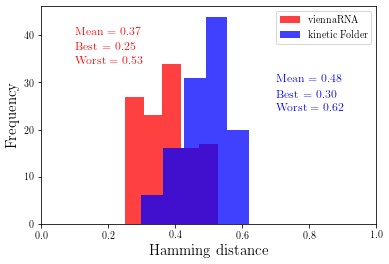

In [82]:
plt.figure()
plt.hist(rna_misses, bins =5, histtype ='bar', color = 'red', alpha =0.75, linestyle= ':', linewidth = 2,label = 'viennaRNA' )
plt.hist(total_misses, bins =5, histtype = 'bar', color='blue', alpha = 0.75,linewidth =2, label='kinetic Folder')
plt.xlim([0,1])
plt.legend(loc='best')
#plt.grid(True, linestyle = ':', linewidth =1)
plt.text(0.1, 40, 'Mean = 0.37', color = 'red', fontsize = 12)
plt.text(0.1, 37, 'Best = 0.25', color = 'red', fontsize =12)
plt.text(0.1, 34, 'Worst = 0.53', color = 'red', fontsize =12)
plt.text(0.7, 30, 'Mean = 0.48', color = 'blue',fontsize = 12)
plt.text(0.7, 27, 'Best = 0.30', color = 'blue',fontsize =12)
plt.text(0.7, 24, 'Worst = 0.62', color = 'blue',fontsize =12)
#plt.text(0.7, 30, , fontsize = 12)
plt.xlabel('Hamming distance', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.savefig('bad_seq_plot.pdf', format ='pdf')

## Pseudoknotted Dataset

### Parameters
**Dataset**: bad_seq

**Seq. Length**: <

**minBPinStem**: 3

In [83]:
seq_file = '/Users/harrisonlabollita/Arizona State University/Sulc group/data_set/src.txt'
dot_file = '/Users/harrisonlabollita/Arizona State University/Sulc group/data_set/tgt.txt'
rna_fold_file = '/Users/harrisonlabollita/Arizona State University/Sulc group/data_set/RNA_tgt.txt'
sequences = []
brackets = []
rnaFold = []
with open(seq_file, 'r') as file:
    for line in file:
        sequences.append(line.rstrip())
with open(dot_file, 'r') as file:
    for line in file:
        brackets.append(line.rstrip())
with open(rna_fold_file, 'r') as file:
    for line in file:
            rnaFold.append(line.rstrip())
seqLength = [len(seq) for seq in sequences]
print('Mean length: %0.1f ntds' %(np.mean(seqLength)))
print('Max length: %d ntds' %(np.max(seqLength)))
print('Min length: %d ntds' %(np.min(seqLength)))
print('Dataset length:', len(sequences))

Mean length: 29.3 ntds
Max length: 37 ntds
Min length: 21 ntds
Dataset length: 15


# Results for Pseudoknotted structures

In [84]:
total_misses = []
rna_misses = []
for i in range(len(sequences)):
    seq = sequences[i]
    dot = brackets[i]
    rnafold = rnaFold[i]
    start = time.time()
    G = GILLESPIE.Gillespie(seq, [], maxTime = 5, toPrint = False, initTime = False)
    structure = myReplace((G.runGillespie()))
    mistakes = compareStructs(structure, dot)
    rna_mistake = compareStructs(rnafold, dot)
    rna_mistake /= len(seq)
    mistakes /= len(seq)
    total_misses.append(mistakes)
    rna_misses.append(rna_mistake)
    stop = time.time()
    print('{}/{}, Length: {}, Time: {:0.4f}, myCorrect(%): {:0.2f} RNAfoldCorrect(%): {:0.2f}'.format(i+1, len(sequences), len(seq), abs(stop-start), mistakes,rna_mistake))
    print('Actual:', dot)
    print('myFolder:',structure)
    print('rnaFold:', rnafold)

1/15, Length: 37, Time: 0.2002, myCorrect(%): 0.49 RNAfoldCorrect(%): 0.32
Actual: .......(((((..((((..)))))....))))....
myFolder: .....................................
rnaFold: ...........((.((((...........)))).)).
2/15, Length: 26, Time: 0.0405, myCorrect(%): 0.38 RNAfoldCorrect(%): 0.23
Actual: (((....((((()))......)))))
myFolder: .......(((.............)))
rnaFold: .......(((((.........)))))
3/15, Length: 26, Time: 0.0533, myCorrect(%): 0.38 RNAfoldCorrect(%): 0.35
Actual: .(((..(((((.))).....))))).
myFolder: ......(((.............))).
rnaFold: ......(((((((....)).))))).
4/15, Length: 31, Time: 1.0716, myCorrect(%): 0.77 RNAfoldCorrect(%): 0.42
Actual: .(((((.(((((()))))......)))))).
myFolder: ...((((...........)))).........
rnaFold: .((((((.....)))))).............


/Users/harrisonlabollita/Arizona State University/Sulc group/src/kinetic_RNA/helperfunctions.py:207: RuntimeWarning: overflow encountered in exp
  updateRates.append([np.exp(deltaS/kB), 1, trialIndex[i]])
/Users/harrisonlabollita/Arizona State University/Sulc group/src/kinetic_RNA/helperfunctions.py:41: RuntimeWarning: invalid value encountered in double_scalars
  rates[i][0] = rates[i][0]/normalization


5/15, Length: 33, Time: 0.9876, myCorrect(%): 0.36 RNAfoldCorrect(%): 0.36
Actual: ..(((((..(((((()))))......)))))).
myFolder: ....(((...(((..)))............)))
rnaFold: ........(((((((...........)))))))


/Users/harrisonlabollita/Arizona State University/Sulc group/src/kinetic_RNA/helperfunctions.py:207: RuntimeWarning: overflow encountered in exp
  updateRates.append([np.exp(deltaS/kB), 1, trialIndex[i]])
/Users/harrisonlabollita/Arizona State University/Sulc group/src/kinetic_RNA/helperfunctions.py:41: RuntimeWarning: invalid value encountered in double_scalars
  rates[i][0] = rates[i][0]/normalization


6/15, Length: 37, Time: 4.4524, myCorrect(%): 0.57 RNAfoldCorrect(%): 0.32
Actual: .......(((((..(((((()))))...))))))...
myFolder: ...(((.(((..)))......))).............
rnaFold: (((....(((((........))))).....)))....
7/15, Length: 24, Time: 0.1696, myCorrect(%): 0.62 RNAfoldCorrect(%): 0.25
Actual: .(((.(((((()))...)))))).
myFolder: ..(((.....)))...........
rnaFold: .....((((((......)))))).
8/15, Length: 26, Time: 0.2663, myCorrect(%): 0.54 RNAfoldCorrect(%): 0.23
Actual: .(((.((((((()))...))))))).
myFolder: (((....(((...))).)))......
rnaFold: .....(((((((......))))))).
9/15, Length: 21, Time: 0.0480, myCorrect(%): 0.33 RNAfoldCorrect(%): 0.62
Actual: .((((((..((())))).))).
myFolder: .((((...(((.)))).))).
rnaFold: ........((((....)))).


/Users/harrisonlabollita/Arizona State University/Sulc group/src/kinetic_RNA/helperfunctions.py:207: RuntimeWarning: overflow encountered in exp
  updateRates.append([np.exp(deltaS/kB), 1, trialIndex[i]])
/Users/harrisonlabollita/Arizona State University/Sulc group/src/kinetic_RNA/helperfunctions.py:41: RuntimeWarning: invalid value encountered in double_scalars
  rates[i][0] = rates[i][0]/normalization


10/15, Length: 30, Time: 0.9773, myCorrect(%): 0.53 RNAfoldCorrect(%): 0.30
Actual: ((((.....((((())))......).))))
myFolder: ...(((....(((.......)))...))).
rnaFold: .........((((.(.........).))))
11/15, Length: 26, Time: 0.1152, myCorrect(%): 0.54 RNAfoldCorrect(%): 0.38
Actual: .(((((.((((()))))..)))))..
myFolder: .......((((...))))........
rnaFold: .(((((......))))).........
12/15, Length: 33, Time: 0.6473, myCorrect(%): 0.30 RNAfoldCorrect(%): 0.27
Actual: .((((.....((((())))......).))))..
myFolder: .(((.......((((...........)))))))
rnaFold: ..........((((((.........))))))..


/Users/harrisonlabollita/Arizona State University/Sulc group/src/kinetic_RNA/helperfunctions.py:207: RuntimeWarning: overflow encountered in exp
  updateRates.append([np.exp(deltaS/kB), 1, trialIndex[i]])
/Users/harrisonlabollita/Arizona State University/Sulc group/src/kinetic_RNA/helperfunctions.py:41: RuntimeWarning: invalid value encountered in double_scalars
  rates[i][0] = rates[i][0]/normalization


13/15, Length: 33, Time: 1.0213, myCorrect(%): 0.48 RNAfoldCorrect(%): 0.33
Actual: .(((((.((((((())))).......)))))))
myFolder: ..(((.....((((.))).....))))......
rnaFold: .......(((((((.(........).)))))))
14/15, Length: 28, Time: 0.3276, myCorrect(%): 0.29 RNAfoldCorrect(%): 0.43
Actual: .((((..(((()))).....))))....
myFolder: .((((......)))).............
rnaFold: .....((((((.........))))))..
15/15, Length: 29, Time: 0.2825, myCorrect(%): 0.62 RNAfoldCorrect(%): 0.48
Actual: .(((....((((()))..)))))......
myFolder: .((((((((....))).......))))).
rnaFold: ....(((((((((.....))))).)))).


/Users/harrisonlabollita/Arizona State University/Sulc group/src/kinetic_RNA/helperfunctions.py:207: RuntimeWarning: overflow encountered in exp
  updateRates.append([np.exp(deltaS/kB), 1, trialIndex[i]])
/Users/harrisonlabollita/Arizona State University/Sulc group/src/kinetic_RNA/helperfunctions.py:41: RuntimeWarning: invalid value encountered in double_scalars
  rates[i][0] = rates[i][0]/normalization


In [85]:
print('myMean:', np.mean(total_misses))
print('myMax:', np.max(total_misses))
print('myMin:', np.min(total_misses))
print('rnaMean:', np.mean(rna_misses))
print('rnaMax:', np.max(rna_misses))
print('rnaMin:', np.min(rna_misses))

myMean: 0.48159914717756763
myMax: 0.7741935483870968
myMin: 0.2857142857142857
rnaMean: 0.3540257211781127
rnaMax: 0.6190476190476191
rnaMin: 0.23076923076923078


# myFolder Results

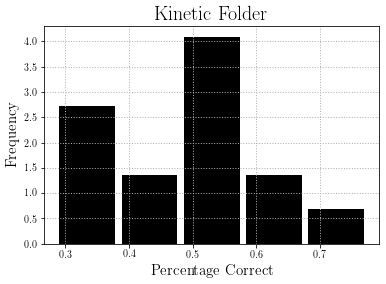

In [86]:
#myCorrect = [1 - total_misses[i] for i in range(len(total_misses))]
plt.figure()
plt.title('Kinetic Folder', fontsize = 20)
plt.xlabel('Percentage Correct', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.grid(True, linestyle = ':', linewidth = 1)
plt.hist(total_misses, bins = 5, density = True, histtype = 'bar', rwidth = 0.9, color = 'black',linewidth = 2)
#plt.savefig('myfolder_pseudo.eps', format = 'eps')

# Vienna RNA Results

(array([4.29245283, 5.1509434 , 1.71698113, 0.85849057, 0.85849057]),
 array([0.23076923, 0.30842491, 0.38608059, 0.46373626, 0.54139194,
        0.61904762]),
 <a list of 5 Patch objects>)

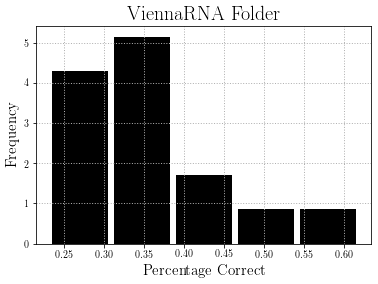

In [87]:
#rnaCorrect = [1 - rna_misses[i] for i in range(len(rna_misses))]
plt.figure()
plt.title('ViennaRNA Folder', fontsize = 20)
plt.xlabel('Percentage Correct', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.grid(True, linestyle = ':', linewidth = 1)
plt.hist(rna_misses, bins = 5, density = True, histtype = 'bar', rwidth = 0.9, color = 'black',linewidth = 2)
#plt.savefig('viennarna_pseudo.eps', format = 'eps')

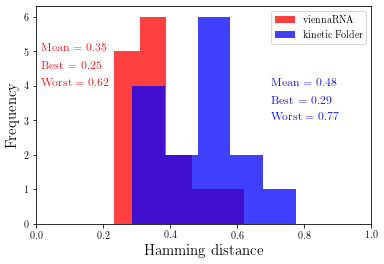

In [97]:
plt.figure()
plt.hist(rna_misses, bins =5, histtype ='bar', color = 'red', alpha =0.75, linestyle= ':', linewidth = 2,label = 'viennaRNA' )
plt.hist(total_misses, bins =5, histtype = 'bar', color='blue', alpha = 0.75,linewidth =2, label='kinetic Folder')
plt.xlim([0,1])
plt.legend(loc='best')
#plt.grid(True, linestyle = ':', linewidth =1)
plt.text(0.0125, 5, 'Mean = 0.35', color = 'red', fontsize = 12)
plt.text(0.0125, 4.5, 'Best = 0.25', color = 'red', fontsize =12)
plt.text(0.0125, 4, 'Worst = 0.62', color = 'red', fontsize =12)
plt.text(0.7, 4, 'Mean = 0.48', color = 'blue',fontsize = 12)
plt.text(0.7, 3.5, 'Best = 0.29', color = 'blue',fontsize =12)
plt.text(0.7, 3, 'Worst = 0.77', color = 'blue',fontsize =12)
plt.xlabel('Hamming distance', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.savefig('pseudo_plot.pdf', format ='pdf')